In [2]:
#Load needed python routines

from matplotlib import pyplot as plt
import xrayutilities as xu
from scipy import misc
import os
import numpy as np
import pandas as pd
import peakutils
from matplotlib import rcParams
from matplotlib import patches
import sys


In [3]:
#Load 4-id-c functions 
from s4idc_funcs_v2 import *

In [4]:
#Set Fonts/Plot Style

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams.update({'font.size': 18})
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

In [5]:
#Choose data file
specpath = "./data/"
specfile = "SSFeb21_mca.mca"

# Get the spec file
sf = specFile(specpath+specfile)
df = get_specScan(sf, 11)  #use file number
df.columns

DEPRECATION WARNING: DataObject.getInfo()
DEPRECATION WARNING: DataObject.getData()


Index(['SGM1:Energy', 'Sum_reflectivity', 'XMCD_reflectivity', 'Sum_TEY',
       'XMCD_TEY', 'Sum_FY', 'XMCD_FY', 'reference', 'ID04b:set_energy.VAL',
       'i0_A', 'TEY_A', '0', 'REF_A', 'i0_B', 'TEY_B', '01', 'REF_B',
       'XMCD_Sum', 'XMCD_Sum1', 'XMCD_Sum2', 'XMCD_TEY1', 'XMCD_TFY',
       'XMCD_REF', '4idc1:scaler1_calc6.VAL', '4idc1:scaler1.S7',
       'Magnet_Field', '4idc1:scaler2.S8', 'Data_anal', 'Data_anal1',
       'XMCD_Sum3', 'XMCD_Sum4', 'XMCD_TFY1', 'TEYN_1', 'TEYN_2', 'XMCD_TEY2',
       'REFN_1', 'REFN_2', 'XMCD_REF1', 'XMCD_Sum5', 'XMCD_Sum6', 'XMCD_Sum7',
       'i/o_fix', 'RFM_Focus', '4idc1:scaler1.S10',
       'Format_string_for_Ctl_query', 'Index'],
      dtype='object')

In [6]:

#(  for sample 4(100) Er:+-5T=114/120, +-1T=116/122,  +-0.5T=118/124) 0.1 T-382/385 and 5T-384/386 for Pr binary alloys)
energy_p5T_Er, _, _, tey_sum_p5T_Er, xmcd_tey_p5T_Er, tfy_sum_p5T_Er, xmcd_tfy_p5T_Er,_ = XMCD(sf,114)  
energy_n5T_Er, _, _, tey_sum_n5T_Er, xmcd_tey_n5T_Er, tfy_sum_n5T_Er, xmcd_tfy_n5T_Er,_ = XMCD(sf,120)
#energy_n5T_Er-=.15

#reverse order of points

energy_p5T_Er = energy_p5T_Er[::-1]
energy_n5T_Er = energy_n5T_Er[::-1]
tey_sum_p5T_Er = tey_sum_p5T_Er[::-1]
tey_sum_n5T_Er = tey_sum_n5T_Er[::-1]
xmcd_tey_p5T_Er = xmcd_tey_p5T_Er[::-1]
xmcd_tey_n5T_Er = xmcd_tey_n5T_Er[::-1]
tfy_sum_p5T_Er = tfy_sum_p5T_Er[::-1]
tfy_sum_n5T_Er = tfy_sum_n5T_Er[::-1]
xmcd_tfy_p5T_Er = xmcd_tfy_p5T_Er[::-1]
xmcd_tfy_n5T_Er = xmcd_tfy_n5T_Er[::-1]



#(for sample 4(100)Pr:+-5T=115/121, +-1T=117/123,  +-0.5T=119/125)  # 0.1 T-394/400 and 5T-399/401 for Pr binary alloys)
energy_p5T_Pr, _, _, tey_sum_p5T_Pr, xmcd_tey_p5T_Pr, tfy_sum_p5T_Pr, xmcd_tfy_p5T_Pr,_ = XMCD(sf,170)
energy_n5T_Pr, _, _, tey_sum_n5T_Pr, xmcd_tey_n5T_Pr, tfy_sum_n5T_Pr, xmcd_tfy_n5T_Pr,_ = XMCD(sf,246)
energy_n5T_Pr+=.1

#reverse order of points

energy_p5T_Pr = energy_p5T_Pr[::-1]
energy_n5T_Pr = energy_n5T_Pr[::-1]
tey_sum_p5T_Pr = tey_sum_p5T_Pr[::-1]
tey_sum_n5T_Pr = tey_sum_n5T_Pr[::-1]
xmcd_tey_p5T_Pr = xmcd_tey_p5T_Pr[::-1]
xmcd_tey_n5T_Pr = xmcd_tey_n5T_Pr[::-1]
tfy_sum_p5T_Pr = tfy_sum_p5T_Pr[::-1]
tfy_sum_n5T_Pr = tfy_sum_n5T_Pr[::-1]
xmcd_tfy_p5T_Pr = xmcd_tfy_p5T_Pr[::-1]
xmcd_tfy_n5T_Pr = xmcd_tfy_n5T_Pr[::-1]

Text(0, 0.5, 'XMCD-Ref')

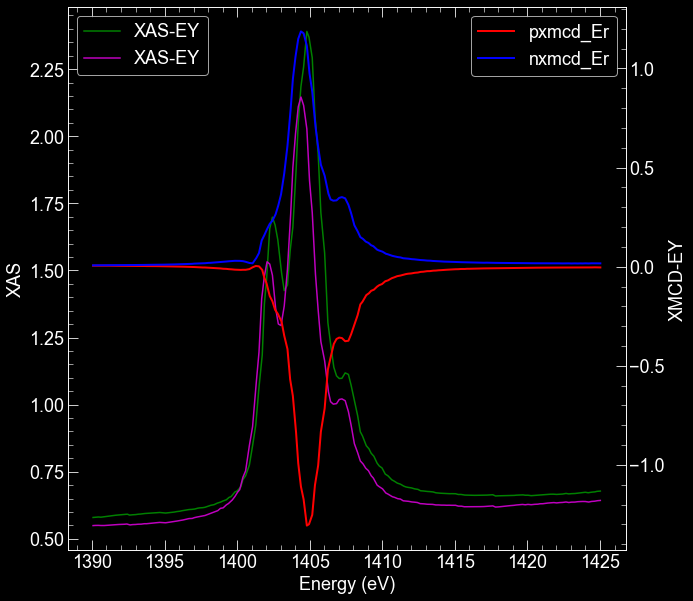

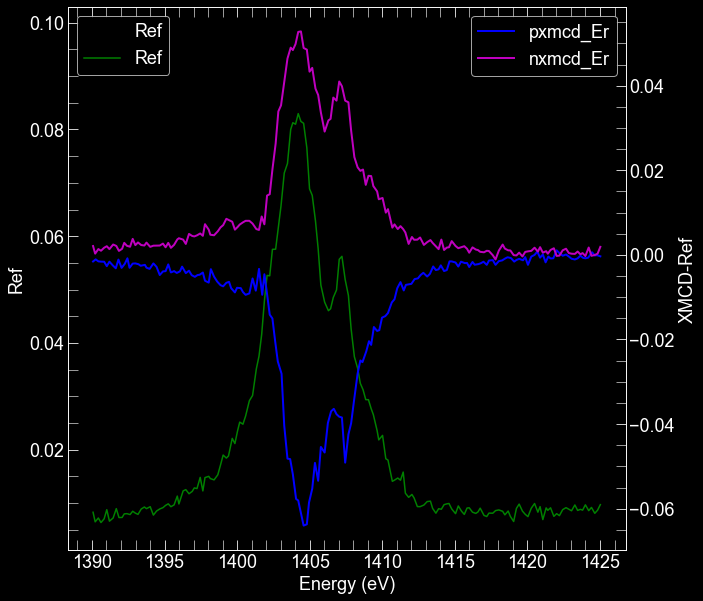

In [7]:
#Look at backgrounds and subtracted data
plt.style.use('dark_background')
fig,ax1 = plt.subplots(1,1,figsize=(10,10))
#ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
ax2 = ax1.twinx()
ax1.plot(energy_p5T_Er,tey_sum_p5T_Er,'g',label='XAS-EY')
ax1.plot(energy_n5T_Er,tey_sum_n5T_Er,'m',label='XAS-EY')
#ax1.set_ylim(0.2,2)
ax1.legend(loc=2)
#ax2.tick_params(axis='both',direction='in',length=10,which='both')
ax2.plot(energy_p5T_Er,xmcd_tey_p5T_Er,'r',lw=2,label='pxmcd_Er')
ax2.plot(energy_n5T_Er,xmcd_tey_n5T_Er,'b',lw=2,label='nxmcd_Er')
ax2.legend(loc=0)
ax2.set_ylabel('XMCD-EY')

#Look at backgrounds and subtracted data

fig,ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('Ref')
ax1.set_xlabel('Energy (eV)')
ax2 = ax1.twinx()
ax1.plot(energy_p5T_Er,tfy_sum_p5T_Er,'k',label='Ref')
ax1.plot(energy_n5T_Er,tfy_sum_n5T_Er,'g',label='Ref')
#ax1.set_ylim(0.2,2)
ax1.legend(loc=2)
ax2.tick_params(axis='both',direction='in',length=10,which='both')
ax2.plot(energy_p5T_Er,xmcd_tfy_p5T_Er,'b',lw=2,label='pxmcd_Er')
ax2.plot(energy_n5T_Er,xmcd_tfy_n5T_Er,'m',lw=2,label='nxmcd_Er')
ax2.legend(loc=0)
ax2.set_ylabel('XMCD-Ref')

Text(0, 0.5, 'XMCD-Ref')

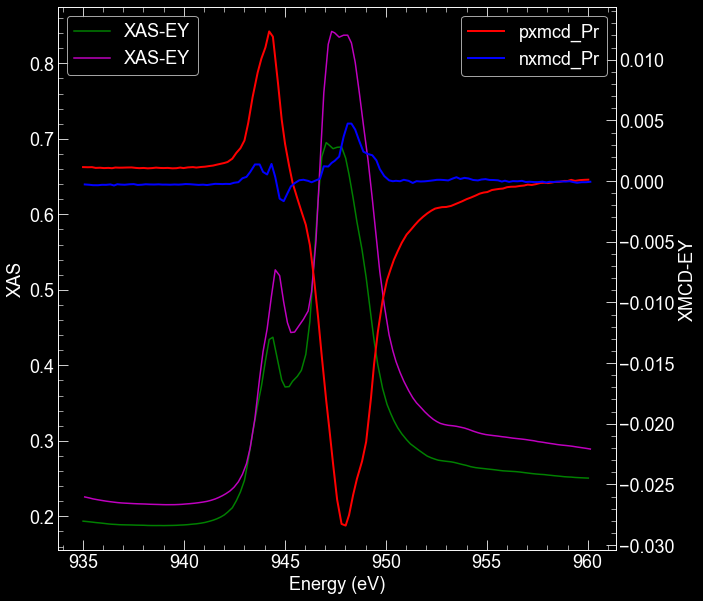

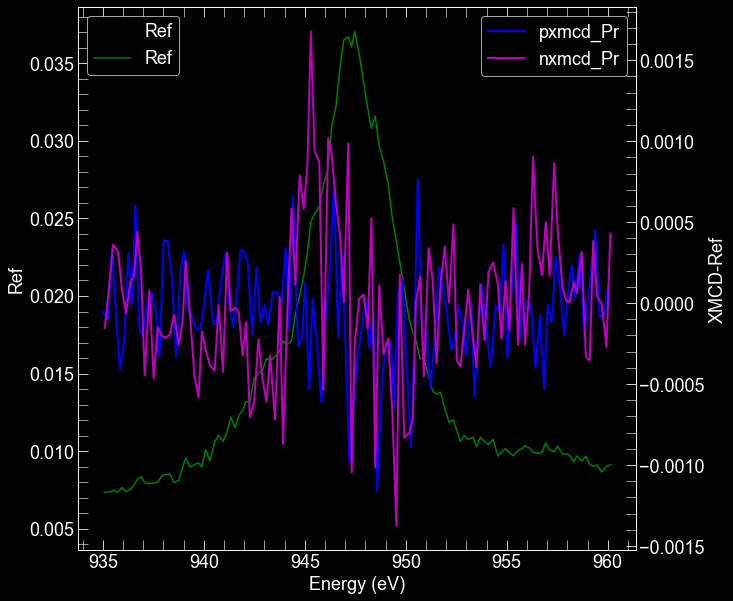

In [8]:
#Look at backgrounds and subtracted data
plt.style.use('dark_background')
fig,ax1 = plt.subplots(1,1,figsize=(10,10))
#ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
ax2 = ax1.twinx()
ax1.plot(energy_p5T_Pr,tey_sum_p5T_Pr,'g',label='XAS-EY')
ax1.plot(energy_n5T_Pr,tey_sum_n5T_Pr,'m',label='XAS-EY')
#ax1.set_ylim(0.2,2)
ax1.legend(loc=2)
#ax2.tick_params(axis='both',direction='in',length=10,which='both')
ax2.plot(energy_p5T_Pr,xmcd_tey_p5T_Pr,'r',lw=2,label='pxmcd_Pr')
ax2.plot(energy_n5T_Pr,xmcd_tey_n5T_Pr,'b',lw=2,label='nxmcd_Pr')
ax2.legend(loc=0)
ax2.set_ylabel('XMCD-EY')

#Look at backgrounds and subtracted data

fig,ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('Ref')
ax1.set_xlabel('Energy (eV)')
ax2 = ax1.twinx()
ax1.plot(energy_p5T_Pr,tfy_sum_p5T_Pr,'k',label='Ref')
ax1.plot(energy_n5T_Pr,tfy_sum_n5T_Pr,'g',label='Ref')
#ax1.set_ylim(0.2,2)
ax1.legend(loc=2)
ax2.tick_params(axis='both',direction='in',length=10,which='both')
ax2.plot(energy_p5T_Pr,xmcd_tfy_p5T_Pr,'b',lw=2,label='pxmcd_Pr')
ax2.plot(energy_n5T_Pr,xmcd_tfy_n5T_Pr,'m',lw=2,label='nxmcd_Pr')
ax2.legend(loc=0)
ax2.set_ylabel('XMCD-Ref')

In [9]:
#Fix energy shifts
peak_pos_Er_p5T = (np.where(tey_sum_p5T_Er==np.nanmax(tey_sum_p5T_Er)))
peak_pos_Er_n5T = (np.where(tey_sum_n5T_Er==np.nanmax(tey_sum_n5T_Er)))

dif_Eng_Er_5T = energy_p5T_Er[peak_pos_Er_p5T] - energy_n5T_Er[peak_pos_Er_n5T]
print(dif_Eng_Er_5T)
energy_n5T_Er += dif_Eng_Er_5T


#Fix energy shifts
peak_pos_Pr_p5T = (np.where(tey_sum_p5T_Pr==np.nanmax(tey_sum_p5T_Pr)))
peak_pos_Pr_n5T = (np.where(tey_sum_n5T_Pr==np.nanmax(tey_sum_n5T_Pr)))

dif_Eng_Pr_5T = energy_p5T_Pr[peak_pos_Pr_p5T] - energy_n5T_Pr[peak_pos_Pr_n5T]
print(dif_Eng_Pr_5T)
energy_n5T_Pr += dif_Eng_Pr_5T


[0.40817]
[-0.268712]


In [16]:
energy_p5T_Er[peak_pos_Er_p5T]

array([1404.80344])

In [10]:
#norm xmcd Er
sctey_p5T_Er, scxmcd_tey_p5T_Er = norm_xmcd(tey_sum_p5T_Er, xmcd_tey_p5T_Er)
sctey_n5T_Er, scxmcd_tey_n5T_Er = norm_xmcd(tey_sum_n5T_Er, xmcd_tey_n5T_Er)
sctfy_p5T_Er, scxmcd_tfy_p5T_Er = norm_xmcd(tfy_sum_p5T_Er, xmcd_tfy_p5T_Er)
sctfy_n5T_Er, scxmcd_tfy_n5T_Er = norm_xmcd(tfy_sum_n5T_Er, xmcd_tfy_n5T_Er)

#norm xmcd Pr
sctey_p5T_Pr, scxmcd_tey_p5T_Pr = norm_xmcd(tey_sum_p5T_Pr, xmcd_tey_p5T_Pr)
sctey_n5T_Pr, scxmcd_tey_n5T_Pr = norm_xmcd(tey_sum_n5T_Pr, xmcd_tey_n5T_Pr)
sctfy_p5T_Pr, scxmcd_tfy_p5T_Pr = norm_xmcd(tfy_sum_p5T_Pr, xmcd_tfy_p5T_Pr)
sctfy_n5T_Pr, scxmcd_tfy_n5T_Pr = norm_xmcd(tfy_sum_n5T_Pr, xmcd_tfy_n5T_Pr)

Normalization:  1.8112911429379999
Normalization:  1.59700645659
Normalization:  0.09257392958685001
Normalization:  0.07660248745554
Normalization:  0.507221202237
Normalization:  0.6268557732819999
Normalization:  0.01838894637085
Normalization:  0.029705759643930005


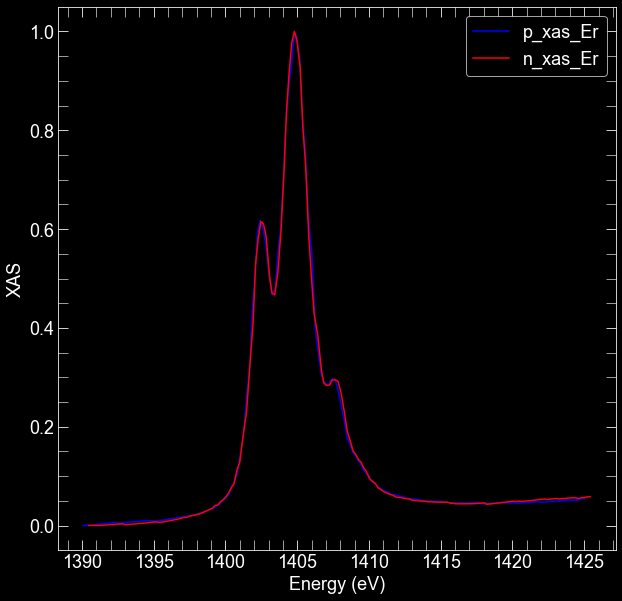

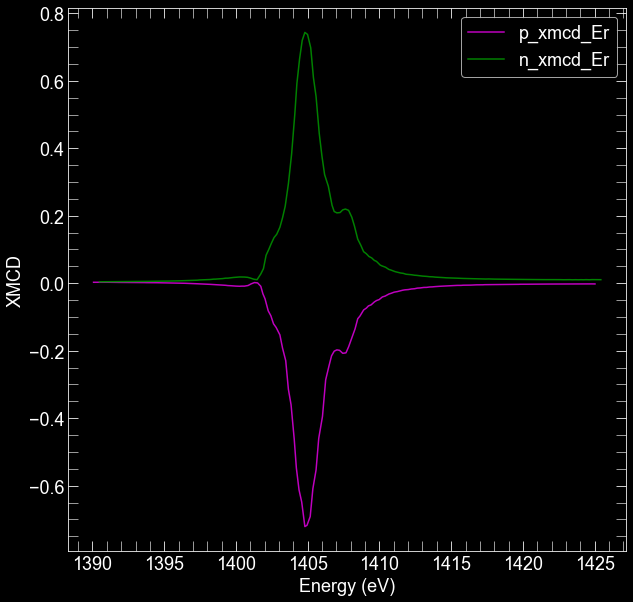

In [11]:
#Look at backgrounds and subtracted data
plt.style.use('dark_background')
fig,ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
ax1.plot(energy_p5T_Er,sctey_p5T_Er,'b',label='p_xas_Er')
ax1.plot(energy_n5T_Er,sctey_n5T_Er,'r',label='n_xas_Er')
ax1.legend()


#Look at backgrounds and subtracted data

fig,ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XMCD')
ax1.set_xlabel('Energy (eV)')
ax1.plot(energy_p5T_Er,scxmcd_tey_p5T_Er,'m',label='p_xmcd_Er')
ax1.plot(energy_n5T_Er,scxmcd_tey_n5T_Er,'g',label='n_xmcd_Er')
ax1.legend()


Text(0.5, 1.0, 'H=+-0.1T-[110]')

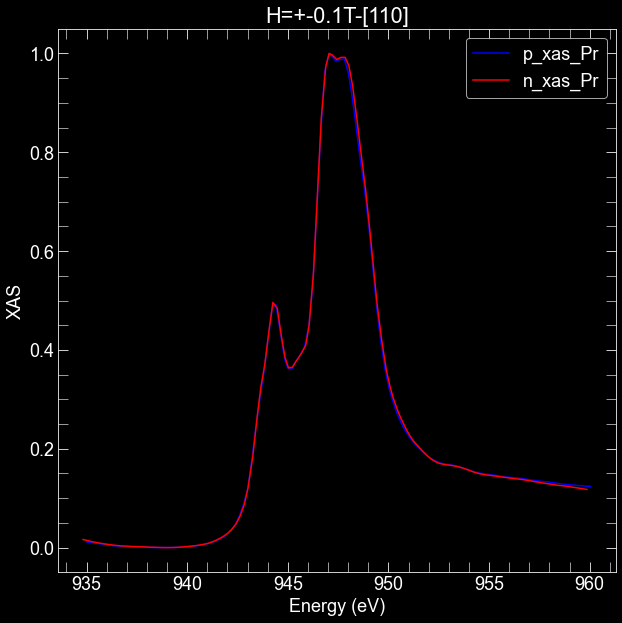

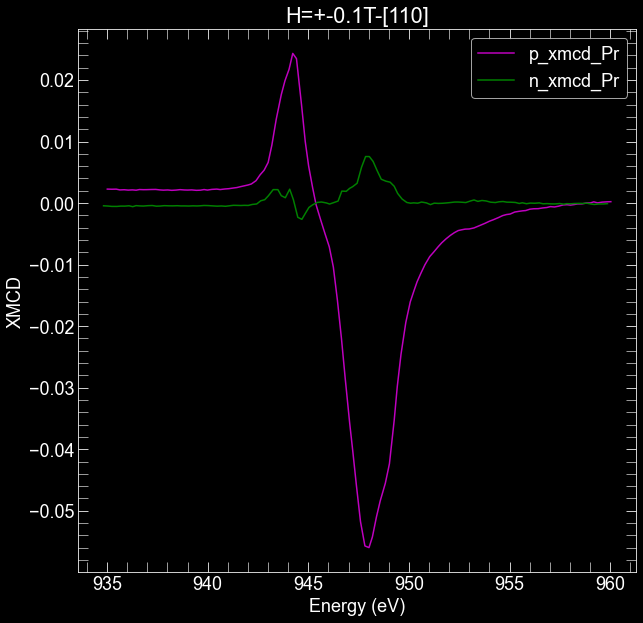

In [12]:
#Look at backgrounds and subtracted data
plt.style.use('dark_background')
fig,ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
ax1.plot(energy_p5T_Pr,sctey_p5T_Pr,'b',label='p_xas_Pr')
ax1.plot(energy_n5T_Pr,sctey_n5T_Pr,'r',label='n_xas_Pr')
ax1.legend()
ax1.set_title('H=+-0.1T-[110]')

#Look at backgrounds and subtracted data

fig,ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XMCD')
ax1.set_xlabel('Energy (eV)')
ax1.plot(energy_p5T_Pr,scxmcd_tey_p5T_Pr,'m',label='p_xmcd_Pr')
ax1.plot(energy_n5T_Pr,scxmcd_tey_n5T_Pr,'g',label='n_xmcd_Pr')
ax1.legend()
ax1.set_title('H=+-0.1T-[110]')

In [13]:
sctey_sum_Er=(sctey_p5T_Er+np.interp(energy_p5T_Er,energy_n5T_Er,sctey_n5T_Er))/2
scxmcd_tey_dif_Er = (scxmcd_tey_p5T_Er - np.interp(energy_p5T_Er,energy_n5T_Er,scxmcd_tey_n5T_Er))/2
sctfy_sum_Er=(sctfy_p5T_Er+np.interp(energy_p5T_Er,energy_n5T_Er,sctfy_n5T_Er))/2
scxmcd_tfy_dif_Er = (scxmcd_tfy_p5T_Er - np.interp(energy_p5T_Er,energy_n5T_Er,scxmcd_tfy_n5T_Er))/2
#scxmcd_tey_dif +=.0003

sctey_sum_Pr=(sctey_p5T_Pr+np.interp(energy_p5T_Pr,energy_n5T_Pr,sctey_n5T_Pr))/2
scxmcd_tey_dif_Pr = (scxmcd_tey_p5T_Pr - np.interp(energy_p5T_Pr,energy_n5T_Pr,scxmcd_tey_n5T_Pr))/2
sctfy_sum_Pr=(sctfy_p5T_Pr+np.interp(energy_p5T_Pr,energy_n5T_Pr,sctfy_n5T_Pr))/2
scxmcd_tfy_dif_Pr = (scxmcd_tfy_p5T_Pr - np.interp(energy_p5T_Pr,energy_n5T_Pr,scxmcd_tfy_n5T_Pr))/2
scxmcd_tey_dif_Pr +=.00015

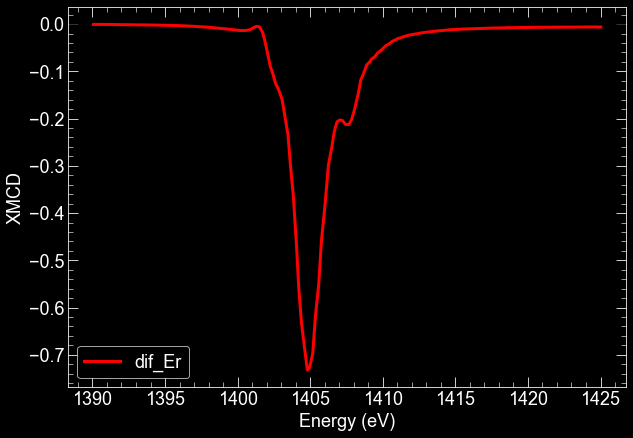

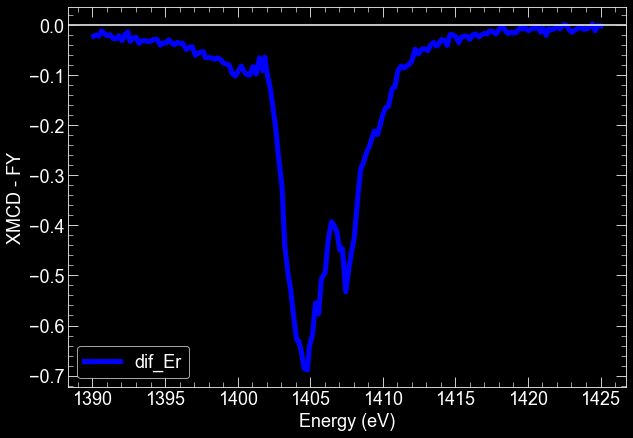

In [14]:
#Look at backgrounds and subtracted data
plt.style.use('dark_background')
fig,ax1 = plt.subplots(1,1,figsize=(10,7))
ax1.set_ylabel('XMCD')
ax1.set_xlabel('Energy (eV)')
ax1.axhline(0,color='k')
ax1.plot(energy_p5T_Er,scxmcd_tey_dif_Er,'g',label='dif_Er', linewidth=3, linestyle='-',color='r')
ax1.legend()

fig,ax1 = plt.subplots(1,1,figsize=(10,7))
ax1.set_ylabel('XMCD - FY')
ax1.set_xlabel('Energy (eV)')
ax1.axhline(0,color='k')
ax1.plot(energy_p5T_Er,scxmcd_tfy_dif_Er,linewidth=5, linestyle='-',color='b',label='dif_Er')
ax1.legend()
ax1.axhline(0,color='w')

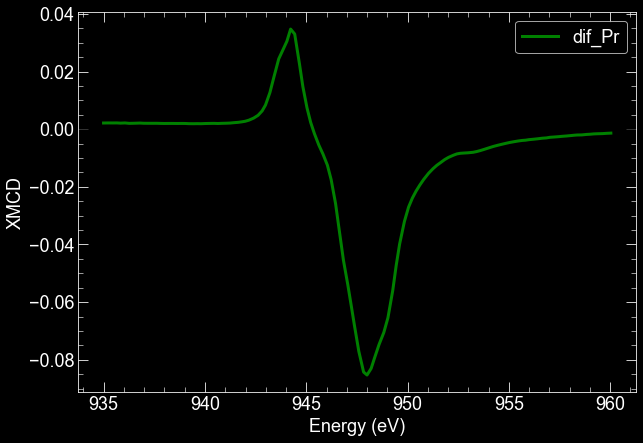

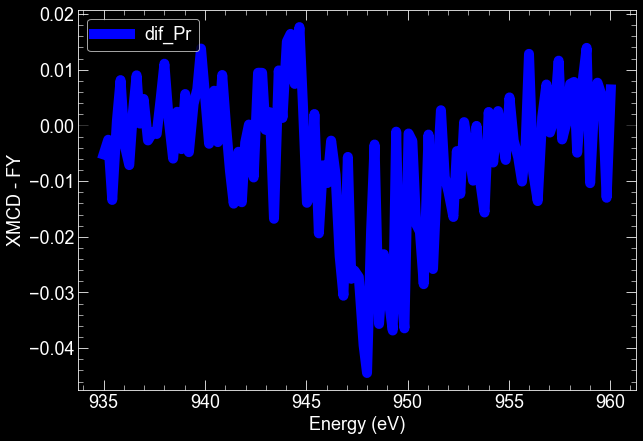

In [24]:
#Look at backgrounds and subtracted data
plt.style.use('dark_background')
fig,ax1 = plt.subplots(1,1,figsize=(10,7))
ax1.set_ylabel('XMCD')
ax1.set_xlabel('Energy (eV)')
ax1.axhline(0,color='k')
ax1.plot(energy_p5T_Pr,scxmcd_tey_dif_Pr,'g',linewidth=3, label='dif_Pr')
ax1.legend()

fig,ax1 = plt.subplots(1,1,figsize=(10,7))
ax1.set_ylabel('XMCD - FY')
ax1.set_xlabel('Energy (eV)')
ax1.axhline(0,color='k')
ax1.plot(energy_p5T_Pr,scxmcd_tfy_dif_Pr,'b',linewidth=10,label='dif_Pr')
ax1.legend()